<a href="https://colab.research.google.com/github/irawan09/Deep_Learning_class/blob/main/drillsTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls '/content/gdrive/My Drive/Colab Notebooks/images3'
train_path = '/content/gdrive/My Drive/Colab Notebooks/images3/1_27.11.2017/'
test_path = '/content/gdrive/My Drive/Colab Notebooks/images3/2_12.04.2019/'

1_27.11.2017  2_12.04.2019  3_21.05.2019  4_31.05.2019	5_04.06.2019


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

img_size=64
batchsize=32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
    validation_split=0.1
) 

test_datagen = ImageDataGenerator(
    rescale=1. / 255, 
) 

train = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=True,
    subset='training') # set as training data

valid = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(img_size, img_size),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=True,
    subset='validation') # set as validation data

test = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batchsize,
    shuffle=True,
    class_mode='categorical')

Found 1500 images belonging to 3 classes.
Found 166 images belonging to 3 classes.
Found 1820 images belonging to 3 classes.


In [ ]:
import tensorflow.keras as keras

model = keras.models.Sequential()

sparse_model = keras.models.Sequential([
  keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
  keras.layers.MaxPool2D(pool_size=(2, 2)),
  #keras.layers.Dropout(0.1),
  keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPool2D(pool_size=(2, 2)),
  #keras.layers.Dropout(0.1),
  ])

model.add(sparse_model)

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 14, 14, 16)        2768      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 203,731
Trainable params: 203,731
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_filename='drillsmodel.hdf5'
callbacks1 = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            # min_delta=1,
            mode='max',
            verbose=1),

        ModelCheckpoint(
            filepath=model_filename,
            monitor='val_accuracy', mode='max',  # mode must be set to max or Keras will be confused
            save_best_only=True,
            verbose=1)
    ]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history = model.fit_generator(generator=train,steps_per_epoch=46,validation_steps=5,shuffle=True, epochs=500, validation_data=valid, verbose=1,callbacks=callbacks1)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 14, 14, 16)        2768      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 203,731
Trainable params: 203,731
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#test_loss = model.evaluate(test)
#predictions = model.predict(test)  # Vector of probabilities
#loss, acc = model.evaluate_generator(test,steps=math.ceil(test.samples / batch_size),verbose=1,)
y_pred = model.predict_generator(test,steps=math.ceil(test.samples / batch_size),verbose=1)




57/57 [==============================] - 22s 381ms/step


[[0.08745717 0.64734185 0.26520097]
 [0.91200167 0.01170967 0.07628865]
 [0.07607332 0.5917448  0.33218187]
 [0.01772474 0.6992717  0.28300357]
 [0.99006957 0.00158369 0.00834671]
 [0.7799274  0.05162963 0.168443  ]
 [0.9909176  0.00157441 0.00750805]
 [0.9930549  0.00131485 0.0056302 ]
 [0.96755177 0.0123727  0.02007564]
 [0.55760986 0.18960191 0.25278825]]
[1 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
0.36153846153846153
              precision    recall  f1-score   support

       Green     0.4656    0.4988    0.4816       840
      Yellow     0.1734    0.3536    0.2327       280
         Red     0.4011    0.2000    0.2669       700

    accuracy                         0.3615      1820
   macro avg     0.3467    0.3508    0.3271      1820
weighted avg     0.3958    0.3615    0.3607      1820

[[419 259 162]
 [134  99  47]
 [347 213 140]]


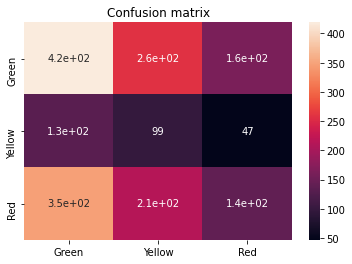

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn;


print(y_pred[:10])
pred_labels = np.argmax(y_pred, axis=1)  # We take the highest probability
print(pred_labels[:10])

y_test = test.classes
print(y_test[:10])

acc = accuracy_score(y_test, pred_labels)
print(acc)

# classification report
target_names=['Green', 'Yellow', 'Red']
report = classification_report(y_test, pred_labels, target_names=target_names,digits=4)
print(report)

with open('classificationreport.txt', 'w') as f:
  f.write(report)

# confusion matrix
CM = confusion_matrix(y_test, pred_labels)
print(CM)

ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=target_names,
           yticklabels=target_names, ax=ax)
ax.set_title('Confusion matrix')
fig = plt.gcf()
plt.show()
fig.savefig('confusionmatrix.png')
